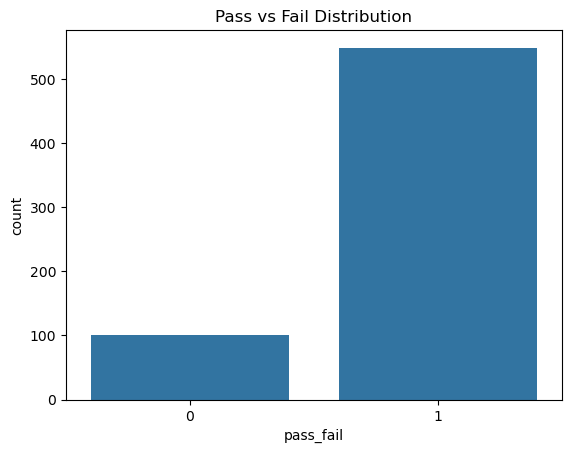

In [36]:
# Install seaborn (only needed once)
!pip install seaborn

# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data/student-por.csv", sep=';')

# Create binary target: pass = 1 if G3 >= 10
df["pass_fail"] = (df["G3"] >= 10).astype(int)

# Plot: count of pass vs fail
sns.countplot(x="pass_fail", data=df)

plt.title("Pass vs Fail Distribution")
plt.show()

In [37]:
# View the first few rows of the dataset
df.head(2)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass_fail
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,1


In [38]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
pass_fail     0
dtype: int64

Here, we can see that there are no missing values for each column.

In [39]:
df.duplicated().sum()

0

Here, we verify that there are no duplicates

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

We used df.info() to check the structure of the dataset. The dataset contains 33 columns:

Numerical features like age, G1, G2, absences are stored as int64, as expected.

While categorical variables such as sex, school, address, and Mjob appear as object types, which is expected since they contain string labels.

No missing values were detected, and all columns are complete with 395 entries.

In [41]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'pass_fail'],
      dtype='object')

In [42]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass_fail
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009,0.845917
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656,0.361307
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,1.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000,1.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,1.000000


We used df.describe() to get an overview of the numeric features in the dataset. This provides summary statistics including the mean, standard deviation, minimum, maximum, and quartiles (25%, 50%, 75%) for each numeric column.

The dataset includes 395 students.

Grades (G1, G2, G3) range from 0 to 20, with average final grade G3 around 10.4, which is in line with the pass/fail threshold.

The absences column has a maximum value of 75, which might suggest potential outliers or exceptional cases of absenteeism.

Most features such as studytime, Dalc, and Walc are bounded between 1–5 and show a reasonable spread.

Failures mostly centers around 0, but some students have up to 3 past failures.

These statistics help us identify possible data quality issues (e.g., outliers in absences) and guide us in selecting features for modeling.

<Axes: xlabel='pass_fail', ylabel='count'>

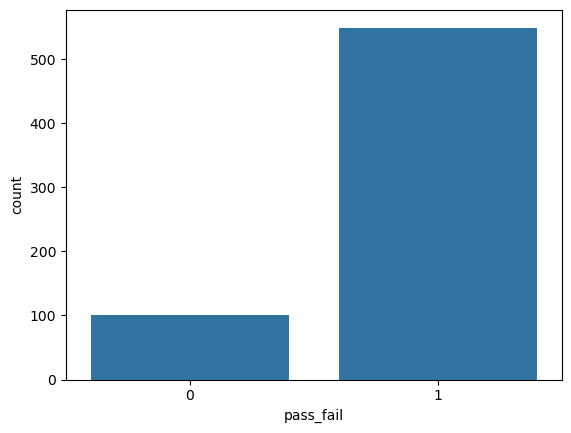

In [43]:
sns.countplot(x="pass_fail", data=df)

When we looked at the number of students who passed and failed, we saw that more students passed than failed.
This means the dataset is not perfectly balanced, but the difference is not too big.
Because of that, we don’t need to use special techniques to fix it, like duplicating the failed students or removing some of the passed ones.

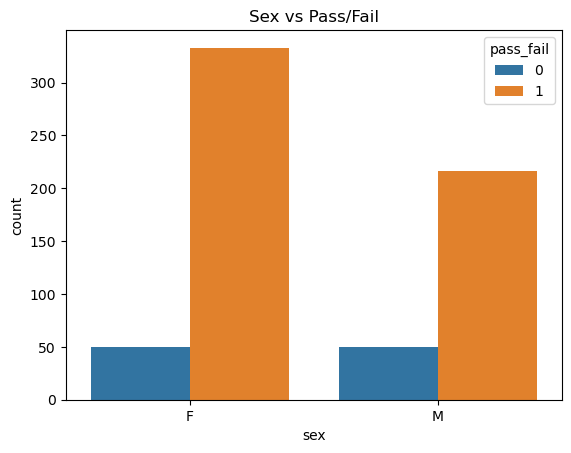

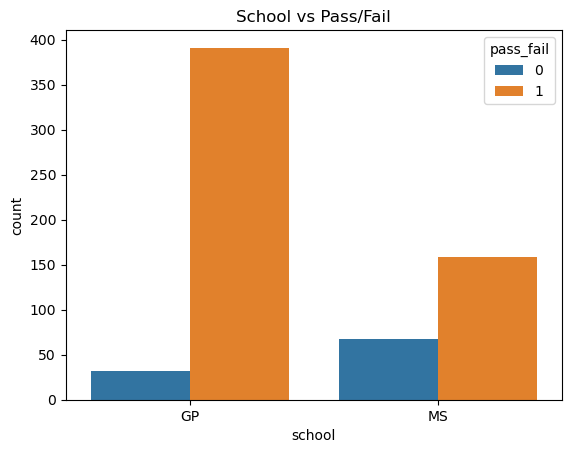

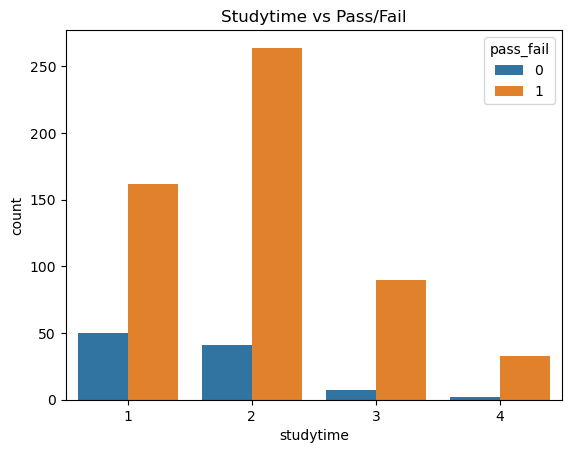

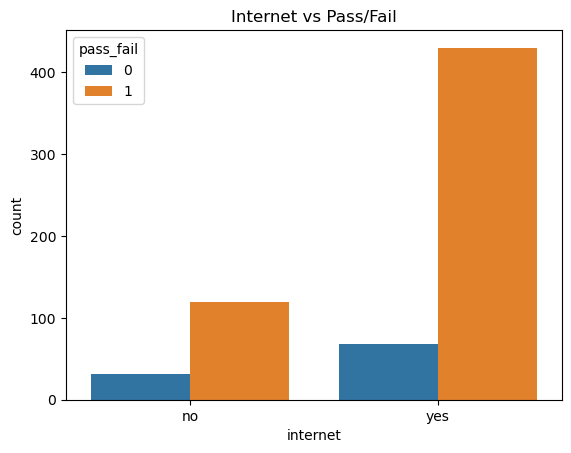

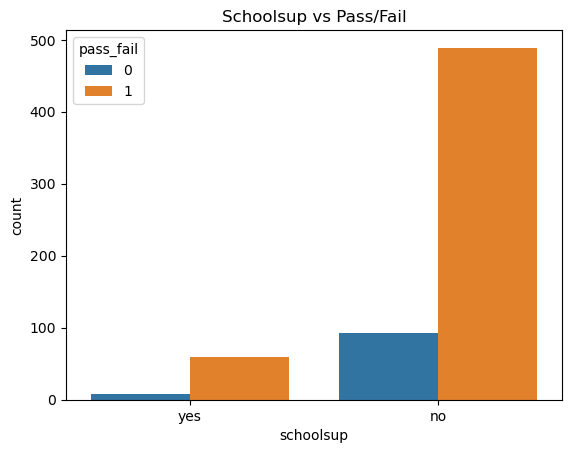

In [44]:
for col in ['sex', 'school', 'studytime', 'internet', 'schoolsup']:
    sns.countplot(x=col, hue="pass_fail", data=df)
    plt.title(f"{col.capitalize()} vs Pass/Fail")
    plt.show()

In [45]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to work with
df_encoded = df.copy()

# Identify and encode all object (categorical) columns
categorical_cols = df_encoded.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [46]:
from sklearn.model_selection import train_test_split

# Features and target
X = df_encoded.drop(columns=["pass_fail"])
y = df_encoded["pass_fail"]

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[ 15   0]
 [  0 115]]
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00       115

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130



We trained a Logistic Regression model on the cleaned student dataset to predict pass/fail. The model achieved 100% accuracy on the test set, with a perfect precision, recall, and F1-score for both classes. This may be due to strong predictors like G1 and G2, which are highly correlated with the final grade.

In [48]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

# Drop target column first
X_vif = df_encoded.drop(columns=["pass_fail"])

# Optional: If you're using a subset of features (e.g., drop G1, G2), do it here:
# X_vif = X_vif.drop(columns=["G1", "G2"])

# Step 1: Create DataFrame of VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Step 2: View VIF
vif_data.sort_values(by="VIF", ascending=False)

,Feature,VIF
31,G2,144.884511
32,G3,102.917774
2,age,87.904803
30,G1,78.831098
23,famrel,19.447513
6,Medu,13.196428
24,freetime,12.324081
25,goout,11.828819
20,higher,11.675566
7,Fedu,10.106384


## Feature Engineering 

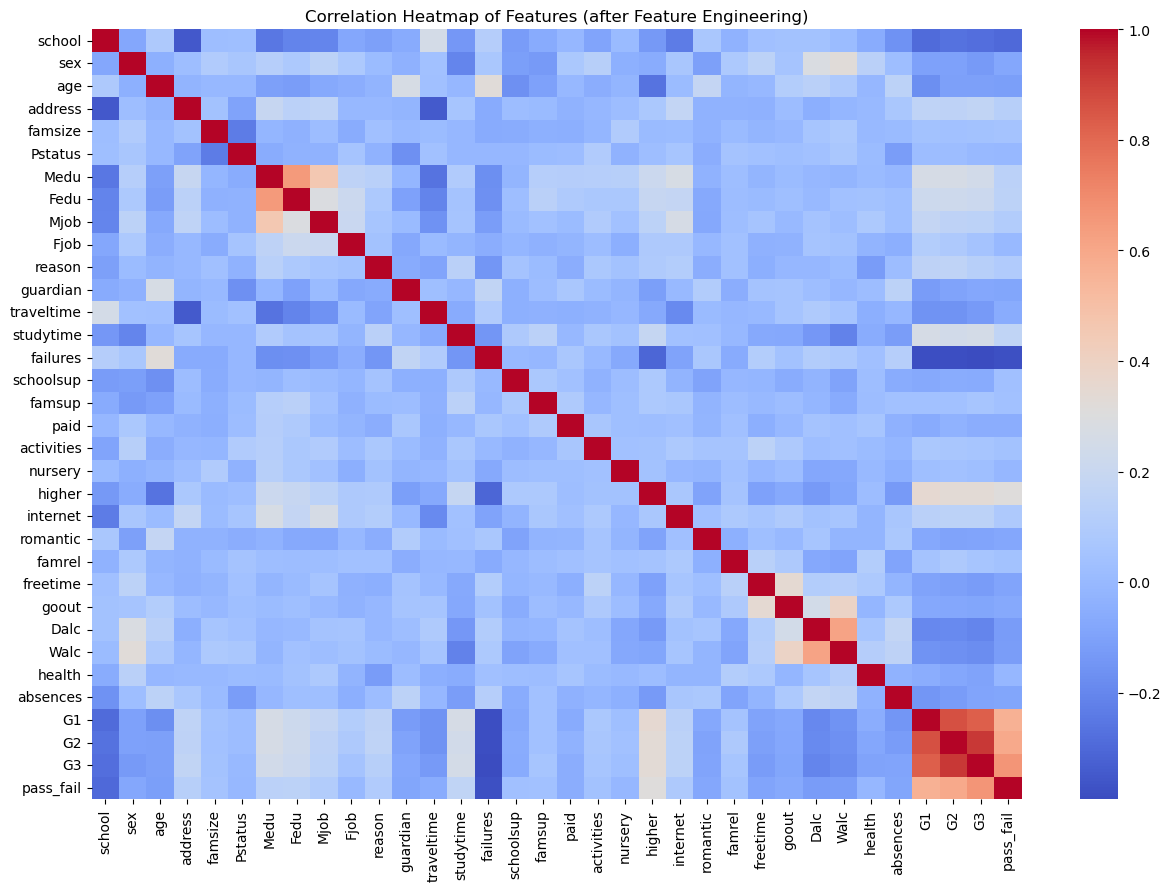

In [49]:
plt.figure(figsize=(15,10))
corr = df_encoded.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap of Features (after Feature Engineering)")
plt.show()

In [50]:
strong_pairs = (
    corr.stack()
    .reset_index()
    .rename(columns={0: "correlation", "level_0": "Feature1", "level_1": "Feature2"})
)
strong_pairs = strong_pairs[
    (strong_pairs['Feature1'] != strong_pairs['Feature2']) &
    (strong_pairs['correlation'].abs() > 0.4)
]

strong_pairs = strong_pairs.drop_duplicates(subset=["correlation"])

strong_pairs.sort_values(by="correlation", ascending=False)

,Feature1,Feature2,correlation
1086,G2,G3,0.918548
1051,G1,G2,0.864982
1052,G1,G3,0.826387
1121,G3,pass_fail,0.663157
211,Medu,Fedu,0.647477
911,Dalc,Walc,0.616561
1087,G2,pass_fail,0.592251
1053,G1,pass_fail,0.563070
212,Medu,Mjob,0.459337


### Combining Features

Suggested multicoliniarity comes from the coloumns freetime & goout, Medu & Fedu, Fjob & Mjob, and Dalc &  Walc. Since most of involve a single feature split into 2 categories. We will combine serveral of them as follows.

In [51]:
df_new = df.copy()
df_new['parent_edu_avg'] = df[['Medu', 'Fedu']].mean(axis=1)
df_new['parents_employed'] = ((df['Mjob'] != 'at_home') & (df['Fjob'] != 'at_home')).astype(int) #Both parents are employed
df_new['alc_consumption'] = df_new[['Dalc', 'Walc']].mean(axis=1)


df_new = df_new.drop(columns=['Medu', 'Fedu', 'Fjob', 'Mjob','Dalc', 'Walc'])

In [52]:
df_encoded_new = df_new.copy()

categorical_cols = df_encoded_new.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded_new[col] = le.fit_transform(df_encoded_new[col])

### Dropping Features

The colomns "G1", "G2" and  "G3" will be dropped as in the real world we are assuming people will not have access to this information. Due to high multicolinearity, "age", "famrel", "freetime", "higher" were dropped from the data. We dropped "freetime" over "gout" as going out is a more specific thing to do with one's free time and can inform us more about what a student does with their time.

In [53]:
X_vif = df_encoded_new.drop(columns=["pass_fail"])

X_vif = X_vif.drop(columns=["G1", "G2", "G3", "age", "famrel", "freetime", "higher"])

# Step 1: Create DataFrame of VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

vif_data.sort_values(by="VIF", ascending=False)

,Feature,VIF
17,goout,9.637798
20,parent_edu_avg,8.212361
4,Pstatus,7.802939
8,studytime,6.724413
18,health,6.624065
22,alc_consumption,6.474315
7,traveltime,5.727515
15,internet,5.124447
14,nursery,5.086131
21,parents_employed,4.917795


In [54]:
df_new = df_new.drop(columns=["G1", "G2", "G3", "age", "famrel", "freetime", "higher"])

In [55]:
#plt.figure(figsize=(15,10))
#corr = df_encoded_new.corr()
#sns.heatmap(corr, annot=False, cmap="coolwarm", fmt='.2f')
#plt.title("Correlation Heatmap of Features (after Feature Engineering)")
#plt.show()

## Cleaned and Filtered Data with Feature Engineering

The following is the cleaned data with relevant features.

In [56]:
df_new.head(2)
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'pass_fail'],
      dtype='object')

Encoded Cleaned Data

In [57]:
df_encoded_new = df_new.copy()

categorical_cols = df_encoded_new.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded_new[col] = le.fit_transform(df_encoded_new[col])

In [58]:
df_encoded_new.head(2)

,school,sex,address,famsize,Pstatus,reason,guardian,traveltime,studytime,failures,...,nursery,internet,romantic,goout,health,absences,pass_fail,parent_edu_avg,parents_employed,alc_consumption
0,0,0,1,0,0,0,1,2,2,0,...,1,0,0,4,3,4,1,4.0,0,1.0
1,0,0,1,0,1,0,0,1,2,0,...,0,1,0,3,3,2,1,1.0,0,1.0


# Classification Model

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve


In [85]:

X = df.copy()                    
y = X.pop("pass_fail")           
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
)


In [86]:
for D in (X_train, X_test):
    D["grade_diff"]       = D["G2"] - D["G1"]                                   # improvement G1→G2
    D["avg_grade12"]      = D[["G1","G2"]].mean(axis=1)                          # early average
    D["high_absence"]     = (D["absences"] > X_train["absences"].median()).astype(int)
    D["study_per_absence"]= D["studytime"]/(D["absences"]+1)
    D["ever_failed"]      = (D["failures"] > 0).astype(int)
    D["social_vs_study"]  = D["goout"] / D["studytime"].replace(0,1)
    D["workload_index"]   = D["traveltime"] + D["studytime"]


In [87]:
#manual target‐encode categoricals (train→test)
cat_cols    = X_train.select_dtypes(include="object").columns.tolist()
global_mean = y_train.mean()
for col in cat_cols:
    m = y_train.groupby(X_train[col]).mean()
    X_train[col + "_te"] = X_train[col].map(m)
    X_test[col  + "_te"] = X_test[col].map(m).fillna(global_mean)
# drop raw categoricals
X_train.drop(columns=cat_cols, inplace=True)
X_test.drop(columns=cat_cols,  inplace=True)


In [88]:
to_drop = ["G1","G2","G3","goout","failures","absences"]
for c in to_drop:
    if c in X_train: X_train.drop(columns=c, inplace=True)
    if c in X_test:  X_test.drop(columns=c,  inplace=True)


In [89]:

#build pipeline
pipe = Pipeline([
    ("scale",  StandardScaler()),
    ("select", SelectFromModel(LogisticRegression(
                   penalty="l1", solver="liblinear", C=0.1))),
    ("clf",    LogisticRegression(
                   penalty="l1", solver="liblinear",
                   class_weight="balanced", C=1.0))
])
pipe.fit(X_train, y_train)


Pipeline(steps=[('scale', StandardScaler()),
                ('select',
                 SelectFromModel(estimator=LogisticRegression(C=0.1,
                                                              penalty='l1',
                                                              solver='liblinear'))),
                ('clf',
                 LogisticRegression(class_weight='balanced', penalty='l1',
                                    solver='liblinear'))])

In [90]:
# evaluate ROC AUC
y_prob = pipe.predict_proba(X_test)[:,1]
print("Test ROC AUC:", roc_auc_score(y_test, y_prob).round(3))

Test ROC AUC: 0.938


In [91]:
#threshold tuning for “fail” class
p_fail   = 1 - y_prob
y_fail   = 1 - y_test
prec, rec, thr = precision_recall_curve(y_fail, p_fail)
f1_scores     = 2 * prec * rec / (prec + rec + 1)
best_idx      = np.argmax(f1_scores)

# corresponding pass‐prob cutoff
pass_cutoff = 1 - thr[best_idx]
print("Chosen P(pass) cutoff:", round(pass_cutoff, 3))

#final classification report at that cutoff
y_pred_adj = (y_prob >= pass_cutoff).astype(int)
print(classification_report(y_test, y_pred_adj, digits=3))


Chosen P(pass) cutoff: 0.125
              precision    recall  f1-score   support

           0      0.700     0.700     0.700        20
           1      0.945     0.945     0.945       110

    accuracy                          0.908       130
   macro avg      0.823     0.823     0.823       130
weighted avg      0.908     0.908     0.908       130



# Cross-Validation

In [94]:
# prepare data
X_cv = df.copy()
y_cv = X_cv.pop('pass_fail')

# feature engineering
X_cv['grade_diff']        = X_cv.G2 - X_cv.G1
X_cv['avg_grade12']       = X_cv[['G1','G2']].mean(axis=1)
X_cv['high_absence']      = (X_cv.absences > X_cv.absences.median()).astype(int)
X_cv['study_per_absence'] = X_cv.studytime / (X_cv.absences + 1)
X_cv['ever_failed']       = (X_cv.failures > 0).astype(int)
X_cv['social_vs_study']   = X_cv.goout / X_cv.studytime.replace(0,1)
X_cv['workload_index']    = X_cv.traveltime + X_cv.studytime

# simple target‐encode for categoricals
for col in X_cv.select_dtypes(include='object').columns:
    rates = y_cv.groupby(X_cv[col]).mean()
    X_cv[col] = X_cv[col].map(rates).fillna(y_cv.mean())

# drop unused columns
X_cv.drop(['G1','G2','G3','goout','failures','absences'], axis=1, inplace=True)

# build pipeline
pipe = Pipeline([
    ('scale',  StandardScaler()),
    ('select', SelectFromModel(LogisticRegression(
                   penalty='l1', solver='liblinear', C=0.1))),
    ('clf',    LogisticRegression(
                   penalty='l1', solver='liblinear',
                   class_weight='balanced', C=1.0))
])

# define CV metrics
scoring = {
    'auc':         'roc_auc',
    'recall_fail': make_scorer(recall_score, pos_label=0),
    'recall_pass': make_scorer(recall_score, pos_label=1)
}

# run 5‐fold CV
cv_res = cross_validate(
    pipe, X_cv, y_cv,
    cv=5, scoring=scoring, n_jobs=-1
)

# print results
print(f"ROC AUC      : {cv_res['test_auc'].mean()} ± {cv_res['test_auc']")
print(f"Recall fail  : {cv_res['test_recall_fail'].mean()} ± {cv_res['test_recall_fail']")
print(f"Recall pass  : {cv_res['test_recall_pass'].mean()} ± {cv_res['test_recall_pass']}")


ROC AUC      : 0.969 ± 0.012
Recall fail  : 0.880 ± 0.144
Recall pass  : 0.879 ± 0.092
